In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
training90s = pd.read_csv('dataset-of-90s.csv')
testing00s = pd.read_csv('dataset-of-00s.csv')

%matplotlib inline
training90s.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')

In [3]:
#Hente ut verdier fra en kolonnoe
training90s['track']

0                                          Misty Roses
1                                           Never Ever
2                                          Soul Sermon
3                            Clarinet Marmalade - Live
4       До смерті і довше - Drum & Base and Rock Remix
                             ...                      
5515                             (You're A) Go Nowhere
5516                                La Fiebre de Norma
5517                                        Good Times
5518                                             Inane
5519                You Can Make History (Young Again)
Name: track, Length: 5520, dtype: object

In [4]:
#Hent ut en dataframe med to kolonner:
type(training90s[['track','artist']])
training90s[['track','artist']]

,track,artist
0,Misty Roses,Astrud Gilberto
1,Never Ever,All Saints
2,Soul Sermon,Gregg Karukas
3,Clarinet Marmalade - Live,Alton Purnell
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin
...,...,...
5515,(You're A) Go Nowhere,Reagan Youth
5516,La Fiebre de Norma,La Castañeda
5517,Good Times,Edie Brickell
5518,Inane,KMFDM


In [5]:
#Hent første raden i en dataframe:
training90s.loc[0]

track                                        Misty Roses
artist                                   Astrud Gilberto
uri                 spotify:track:50RBM1j1Dw7WYmsGsWg9Tm
danceability                                       0.527
energy                                             0.316
key                                                    1
loudness                                         -15.769
mode                                                   1
speechiness                                        0.031
acousticness                                       0.693
instrumentalness                                 0.00699
liveness                                           0.168
valence                                            0.543
tempo                                            116.211
duration_ms                                       158840
time_signature                                         4
chorus_hit                                       53.8952
sections                       

In [6]:
#Hent ut alle sanger som ble en hit, og lag en dataframe
training90s[training90s['target'] == 1]

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.55900,0.000000,0.0492,0.309,134.187,387573,4,32.16853,16,1
6,Baby-Baby-Baby,TLC,spotify:track:1zTuB57LYZa7xu7KUH8kF0,0.679,0.597,11,-8.601,0,0.0439,0.09130,0.000673,0.0487,0.900,184.174,315040,4,20.93007,15,1
7,I Missed The Bus,Kris Kross,spotify:track:793gh4IXh7mQsMBhvcJRlt,0.811,0.634,4,-10.408,0,0.0714,0.00469,0.009430,0.2240,0.273,107.915,179160,4,54.78730,9,1
8,The Comfort Zone,Vanessa Williams,spotify:track:7okbmgA8lRBGl5limZ7LFM,0.528,0.234,3,-15.784,1,0.0283,0.64100,0.000000,0.1830,0.191,95.911,218733,4,46.33298,10,1
10,Black Cat,Janet Jackson,spotify:track:4tYpYYoOI7WDxbCnPninwE,0.705,0.913,4,-7.253,0,0.0484,0.10300,0.001110,0.2160,0.665,114.959,290573,4,44.28293,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,Love Like This,Faith Evans,spotify:track:7MQywXGHEev7JmwwIzMcao,0.767,0.551,0,-7.328,1,0.0616,0.00364,0.000000,0.0451,0.796,100.904,275707,4,32.35991,11,1
5513,"No Guns, No Murder",Rayvon,spotify:track:54zbUGqw8JRk020wLRWlHl,0.797,0.683,10,-14.299,0,0.2190,0.08160,0.000000,0.2960,0.885,97.984,277027,4,28.96569,15,1
5514,Deeper,Boss,spotify:track:6PZ4laM20qkvIrgji3NLsK,0.631,0.848,6,-6.435,0,0.3380,0.05500,0.000000,0.3850,0.679,83.155,241560,4,22.23523,13,1
5517,Good Times,Edie Brickell,spotify:track:6UPfnVoOq3y3BvapBIKs8J,0.562,0.314,10,-15.213,0,0.0298,0.44000,0.000011,0.1060,0.571,166.847,189827,4,21.11763,10,1


Text(0, 0.5, 'Prosent')

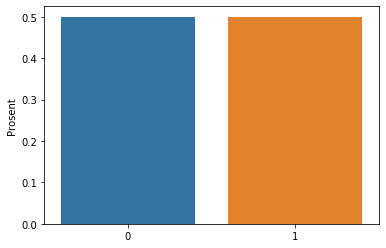

In [7]:
#Plot fordeling av hit/ikke-hit
hit_perc = training90s['target'].value_counts()/len(training90s)


sns.barplot(x=hit_perc.index, y=hit_perc.values)
plt.ylabel("Prosent")

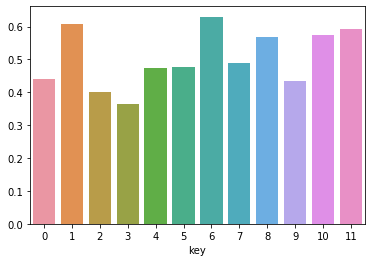

In [8]:
#Hvor stor andel av de ulike "keys" blir en hit?
key_hits = training90s[['key','target']].groupby('key').mean()

sns.barplot(x=key_hits.index , y=key_hits.values[:,0])

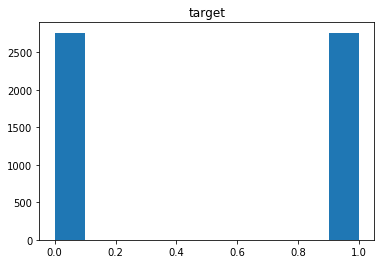

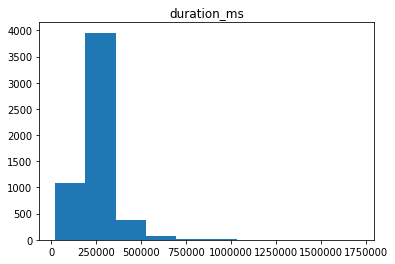

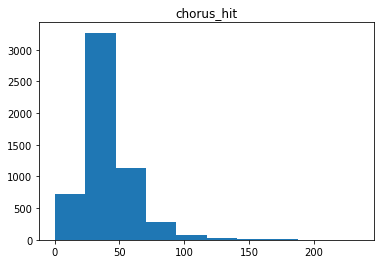

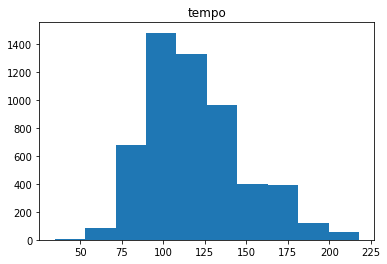

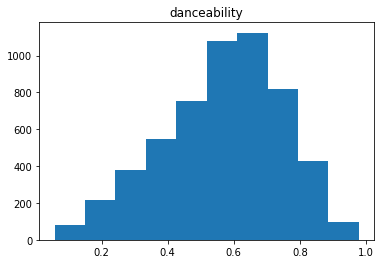

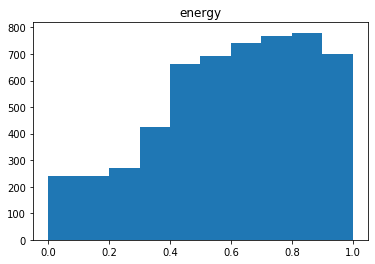

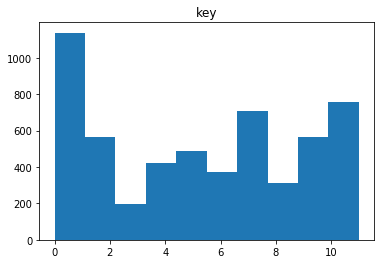

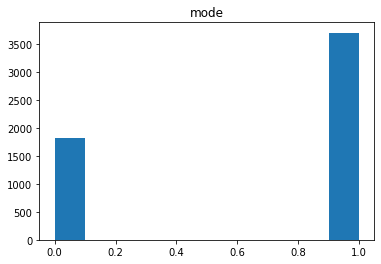

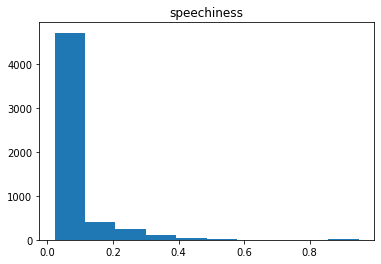

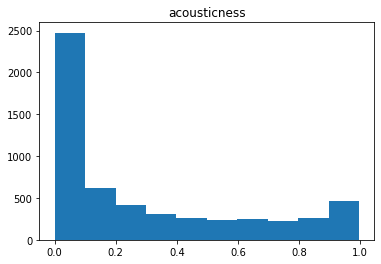

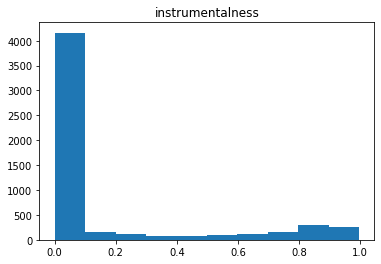

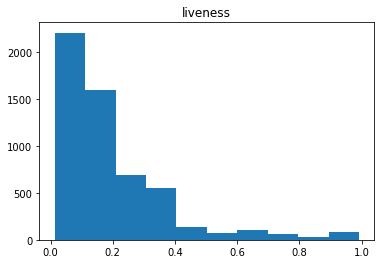

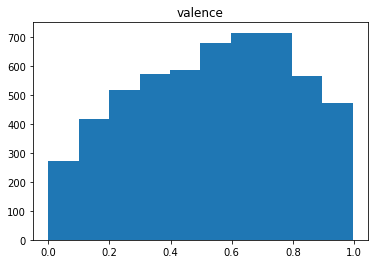

In [9]:
df_num = training90s[['target','duration_ms','chorus_hit','tempo','danceability',
                      'energy','key','mode', 'speechiness', 'acousticness', 'instrumentalness',
                     'liveness','valence']]

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

                  danceability    energy       key  loudness      mode  \
danceability          1.000000  0.131832  0.022007  0.254667 -0.087036   
energy                0.131832  1.000000  0.014851  0.759737 -0.024272   
key                   0.022007  0.014851  1.000000  0.001529 -0.168842   
loudness              0.254667  0.759737  0.001529  1.000000  0.007851   
mode                 -0.087036 -0.024272 -0.168842  0.007851  1.000000   
speechiness           0.206994  0.106341  0.032672  0.051483 -0.070268   
acousticness         -0.218565 -0.717006 -0.026502 -0.585624  0.041464   
instrumentalness     -0.337346 -0.221905 -0.041967 -0.397282 -0.043362   
liveness             -0.097924  0.173991 -0.018231  0.080700  0.004788   
valence               0.548994  0.382065  0.012472  0.315454 -0.025817   
tempo                -0.164141  0.168759 -0.031968  0.119479  0.020958   
duration_ms          -0.065589 -0.097639  0.002333 -0.127918 -0.084847   
time_signature        0.178748  0.1964

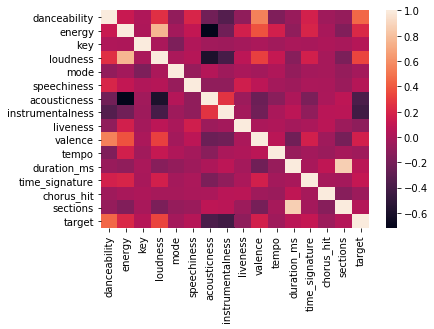

In [10]:
print(training90s.corr())
sns.heatmap(training90s.corr())

In [11]:
print(training90s.shape)
training90s.info()

(5520, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             5520 non-null   object 
 1   artist            5520 non-null   object 
 2   uri               5520 non-null   object 
 3   danceability      5520 non-null   float64
 4   energy            5520 non-null   float64
 5   key               5520 non-null   int64  
 6   loudness          5520 non-null   float64
 7   mode              5520 non-null   int64  
 8   speechiness       5520 non-null   float64
 9   acousticness      5520 non-null   float64
 10  instrumentalness  5520 non-null   float64
 11  liveness          5520 non-null   float64
 12  valence           5520 non-null   float64
 13  tempo             5520 non-null   float64
 14  duration_ms       5520 non-null   int64  
 15  time_signature    5520 non-null   int64  
 16  chorus_hit        5520 non-null

In [12]:
training90s.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.00000,5520.000000,5520.000000,5520.000000,5520.000000,5.520000e+03,5520.000000,5520.000000,5520.000000,5520.000000
mean,0.566893,0.602246,5.263043,-10.235112,0.669565,0.073996,0.29122,0.159886,0.197202,0.537685,118.840424,2.562110e+05,3.922464,40.999358,11.128261,0.500000
std,0.180373,0.252189,3.511379,5.117146,0.470412,0.081979,0.32463,0.304407,0.174573,0.257688,29.489480,1.034398e+05,0.352768,19.941630,4.485026,0.500045
min,0.057600,0.000357,0.000000,-49.253000,0.000000,0.022000,0.00000,0.000000,0.013000,0.000000,34.535000,1.953300e+04,1.000000,0.000000,1.000000,0.000000
25%,0.451000,0.435000,2.000000,-12.207250,0.000000,0.033100,0.01800,0.000000,0.089675,0.330000,96.422000,2.027532e+05,4.000000,28.065100,9.000000,0.000000
50%,0.586000,0.634500,5.000000,-9.091000,1.000000,0.043200,0.14000,0.000228,0.127000,0.556000,114.959000,2.467200e+05,4.000000,36.512680,11.000000,0.500000
75%,0.699000,0.811000,8.000000,-6.893750,1.000000,0.072825,0.52725,0.091375,0.259000,0.751000,135.988000,2.899070e+05,4.000000,48.628155,13.000000,1.000000
max,0.979000,0.998000,11.000000,-1.169000,1.000000,0.950000,0.99600,0.997000,0.992000,0.996000,217.943000,1.711800e+06,5.000000,235.060740,69.000000,1.000000


In [13]:
pd.pivot_table(training90s, index="target", values = ['duration_ms','chorus_hit','tempo','danceability',
                      'energy','key','mode', 'speechiness', 'acousticness', 'instrumentalness',
                     'liveness','valence'])

,acousticness,chorus_hit,danceability,duration_ms,energy,instrumentalness,key,liveness,mode,speechiness,tempo,valence
target,,,,,,,,,,,,
0,0.412928,41.979795,0.485017,248673.717391,0.546950,0.289959,5.075362,0.215048,0.678261,0.069840,119.874108,0.493754
1,0.169511,40.018922,0.648769,263748.270652,0.657542,0.029814,5.450725,0.179356,0.660870,0.078152,117.806741,0.581617


In [14]:
print(pd.pivot_table(training90s, index = 'target', columns = 'key', values = 'tempo' ,aggfunc ='count'))

key      0    1    2    3    4    5    6    7    8    9    10   11
target                                                            
0       362  193  337  123  222  255  138  362  135  319  158  156
1       284  298  226   71  201  234  235  347  178  244  214  228


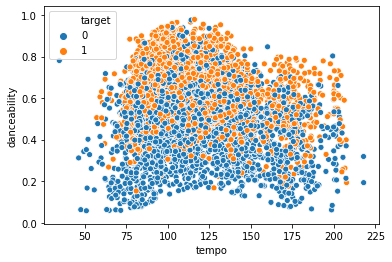

In [15]:
training90s.head()
sns.scatterplot(x='tempo',y='danceability', data =training90s,hue='target')


In [16]:
#https://seaborn.pydata.org/generated/seaborn.scatterplot.html
#Ikke så dumt å bare plotte alt
#for i in df_num.columns:
    #for j in df_num.columns:
        #sns.scatterplot(x=i ,y=j, data =training90s,hue='target')
        #plt.show()

In [17]:
training90s.keys()
#Vil ta bort: 'track', 'artist', 'uri'

usecols = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target']

data90s = training90s[usecols]

data90s.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


In [18]:
from sklearn.model_selection import train_test_split

X,y = data90s.drop('target', axis=1), data90s['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_test.columns)
print(len(X_test.columns))
print(type(X_test))
print("-----")
print(X_train.columns)
print(len(X_train.columns))
print(type(X_train))

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections'],
      dtype='object')
15
<class 'pandas.core.frame.DataFrame'>
-----
Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections'],
      dtype='object')
15
<class 'pandas.core.frame.DataFrame'>
Training set size: 4416
Testing set size: 1104


In [19]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

X_train, X_test = X_train.toarray(), X_test.toarray()

In [20]:
encoder.get_feature_names(X.columns)

array(['danceability_0.0596', 'danceability_0.0617', 'danceability_0.062',
       ..., 'sections_39', 'sections_42', 'sections_47'], dtype=object)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define model
lr_model = LogisticRegression()


# Fit model
lr_model.fit(X_train, y_train)

# Predict training data
train_preds = lr_model.predict(X_train)

# Output accuracy on training data
train_acc = accuracy_score(y_train, train_preds)
print(f"Accuracy on training data: {train_acc:.5f}")


Accuracy on training data: 0.99955


In [22]:
print(type(X_train))
print(X_train.shape)
print(type(X_test))
print(X_test.shape)

<class 'numpy.ndarray'>
(4416, 25603)
<class 'numpy.ndarray'>
(1104, 8973)


In [23]:
# Predict test data
#test_preds = lr_model.predict(X_test)

# Calculate accuracy on test set
#test_acc = accuracy_score(y_test, test_preds)
#print(f"Accuracy on test data: {test_acc:.4f}")

In [24]:
from sklearn.neighbors import KNeighborsClassifier 

# Define model
knn_model = KNeighborsClassifier()

# Fit model
knn_model.fit(X_train, y_train)

# Predict training data
train_preds = knn_model.predict(X_train)

# Output accuracy on training data
train_acc = accuracy_score(y_train, train_preds)
print(f"Accuracy on training data: {train_acc:.4f}")

Accuracy on training data: 0.7534


In [25]:
# Predict test data
test_preds = knn_model.predict(X_test)

# Calculate accuracy on test set
test_acc = accuracy_score(y_test, test_preds)
print(f"Accuracy on test data: {test_acc:.4f}")

ValueError: query data dimension must match training data dimension

In [1]:
from sklearn.ensemble import RandomForestClassifier 

# Define model
rf_model = RandomForestClassifier()

# Fit model
rf_model.fit(X_train, y_train)

# Predict training data
train_preds = rf_model.predict(X_train)

# Output accuracy on training data
train_acc = accuracy_score(y_train, train_preds)
print(f"Accuracy on training data: {train_acc:.4f}")

NameError: name 'X_train' is not defined

In [2]:
# Predict test data
test_preds = rf_model.predict(X_test)

# Calculate accuracy on test set
test_acc = accuracy_score(y_test, test_preds)
print(f"Accuracy on test data: {test_acc:.4f}")

NameError: name 'X_test' is not defined